## Assignment 1

##### Q1. Create side-by-side boxplots for the number of mosquitoes in each group (beer vs water)

In [17]:
# import pandas
import pandas as pd
#import numpy
import numpy as np
# import matplotlib
import matplotlib.pyplot as plt
# import seaborn
import seaborn as sns
%matplotlib inline

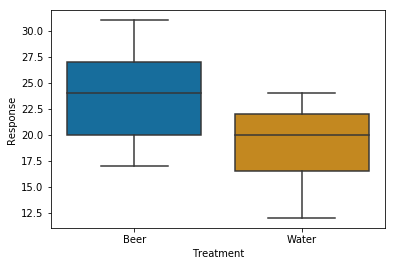

In [13]:
data_url = 'mosquitos_data-2.csv'
# read data from url as pandas dataframe
mosquitos_data = pd.read_csv(data_url)
# Create boxplots
sns.boxplot(y='Response', x='Treatment', 
                 data=mosquitos_data, 
                 palette="colorblind",
         )

#### Q2. What does the graph reveal about the data for both groups? Is there an association between beer consumption and attractiveness to mosquitoes?

Box plot indicates reponse for beer treatment is much higher than the response for water treatment. So it can be stated that beer consumption seems to attract more mosquitos.

##### Q3. Calculate basic statistics measures for each group: the mean, median, standard deviation and explain the numbers.

##### Statistics for beer treatment group ( see output below ) :
min = 17,
mean = 23.6,
max = 31,
median = 24,
std = 4.133


##### Statistics for water treatment group ( see output below ):
min = 12,
mean = 19.22,
max = 24,
median = 20,
std = 3.67

Response data beer treatment group shows higher values for most of its statistical measures as its response values
are much higher than that of water treatment group.


In [14]:
# statistics for Beer treatment
beer_df = mosquitos_data[mosquitos_data['Treatment'] == 'Beer']
beer_df.describe()

,Response
count,25.000000
mean,23.600000
std,4.133199
min,17.000000
25%,20.000000
50%,24.000000
75%,27.000000
max,31.000000


In [15]:
# statistics for water group
water_df = mosquitos_data[mosquitos_data['Treatment'] == 'Water']
water_df.describe()

,Response
count,18.000000
mean,19.222222
std,3.671120
min,12.000000
25%,16.500000
50%,20.000000
75%,22.000000
max,24.000000


#### Q4. Write the code to implement the data simulation demonstrated in the above mentioned video. Calculate the probability of obtaining the experiment outcome.

Ho : Response time is same under both water and beer treatment group.

As the output below shows obtaining means difference greater than *observed* mean (delta)is 0.0006 and it is less than 5%. So we reject Ho and concludes that beer consumption attracts more mosquitos.


In [30]:
# method to run the permutation test
def run_permutation_test( pooled , sizeZ, sizeY, delta):
    np.random.shuffle(pooled)
    starZ = pooled[:sizeZ]
    starY = pooled[-sizeY:]
    return abs(starZ.mean() - starY.mean())

# array contains response time for beer treatment group
z = np.array(beer_df['Response'].tolist())  
# array contains response time for water treatement group
y = np.array(water_df['Response'].tolist()) 
# *observed* mean difference between both treatment
delta = abs(z.mean() - y.mean())
# number of time simulation runs
numSamples = 10000 
# contains means that is greater than *observed* means
estimates = [] 

# combine both arrays
pooled = np.hstack([z,y])
# run the simulation for numSamples time 
for i in range( numSamples ):
    val = run_permutation_test(pooled, z.size, y.size, delta)
    estimates.append(val)
    
es = np.asarray(estimates)

# calculate the p value : probability of diff of means of two groups larger than observed ( delta )
diffCount = len ( np.where( es > delta)[0])
pvalue = diffCount / float(numSamples)
print ("probability of having means difference more than observed " , delta  , " difference(delta) is : ", pvalue )

probability of having means difference more than observed  4.37777777777778  difference(delta) is :  0.0006
